# Sheet 02, Exercise 3
Anne, Asli, Fabian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,12)
%matplotlib inline

In [2]:
def trapezoid(f, a, b, N):
    x = np.linspace(a, b, N + 1)  # We want N intervals, so N+1 points
    h = (b - a) / N
    result = h / 2 * (f(a) + f(b))
    result += h * np.sum(f(x[1:-1]))  # exclude first and last value
    return result


def simpsons(f, a, b, N):
    if N & 2 != 0:
        raise ValueError("N needs to be even!")
    x = np.linspace(a, b, N)
    h = x[1] - x[0]
    y = f(x[1:])  # function value of all support points
    result = 4 * np.sum(y[1:-1:2]) + 2 * np.sum(
        y[2:-1:2]
    )  # stepsize 2, starting at x[1] or x[2] excluding the last element
    result += f(a)
    result += f(b)
    return result * h / 3

In [3]:
def f1(x):
    return np.exp(-x) / x


def f2(x):
    if np.all(x == 0):
        return np.zeros_like(x)
    return x * np.sin(1 / x)

In [4]:
def numericalIntegral(f, a, b, rule, eps):
    I = [0]
    N = [2]
    finished = False
    while not finished:
        N.append(N[-1] * 2)
        I.append(rule(f, a, b, N[-1]))
        finished = np.abs((I[-1] - I[-2]) / I[-1]) < eps
    return I, N

In [5]:
I_trap_1, N_trap_1 = numericalIntegral(f1, 1, 100, trapezoid, 1e-4)
I_simp_1, N_simp_1 = numericalIntegral(f1, 1, 100, simpsons, 1e-4)
I_trap_2, N_trap_2 = numericalIntegral(f2, 0, 1, trapezoid, 1e-4)
I_simp_2, N_simp_2 = numericalIntegral(f2, 0, 1, simpsons, 1e-4)

Text(0.5, 1.0, 'numerical integration values of $f_1(x)$ for different $N$')

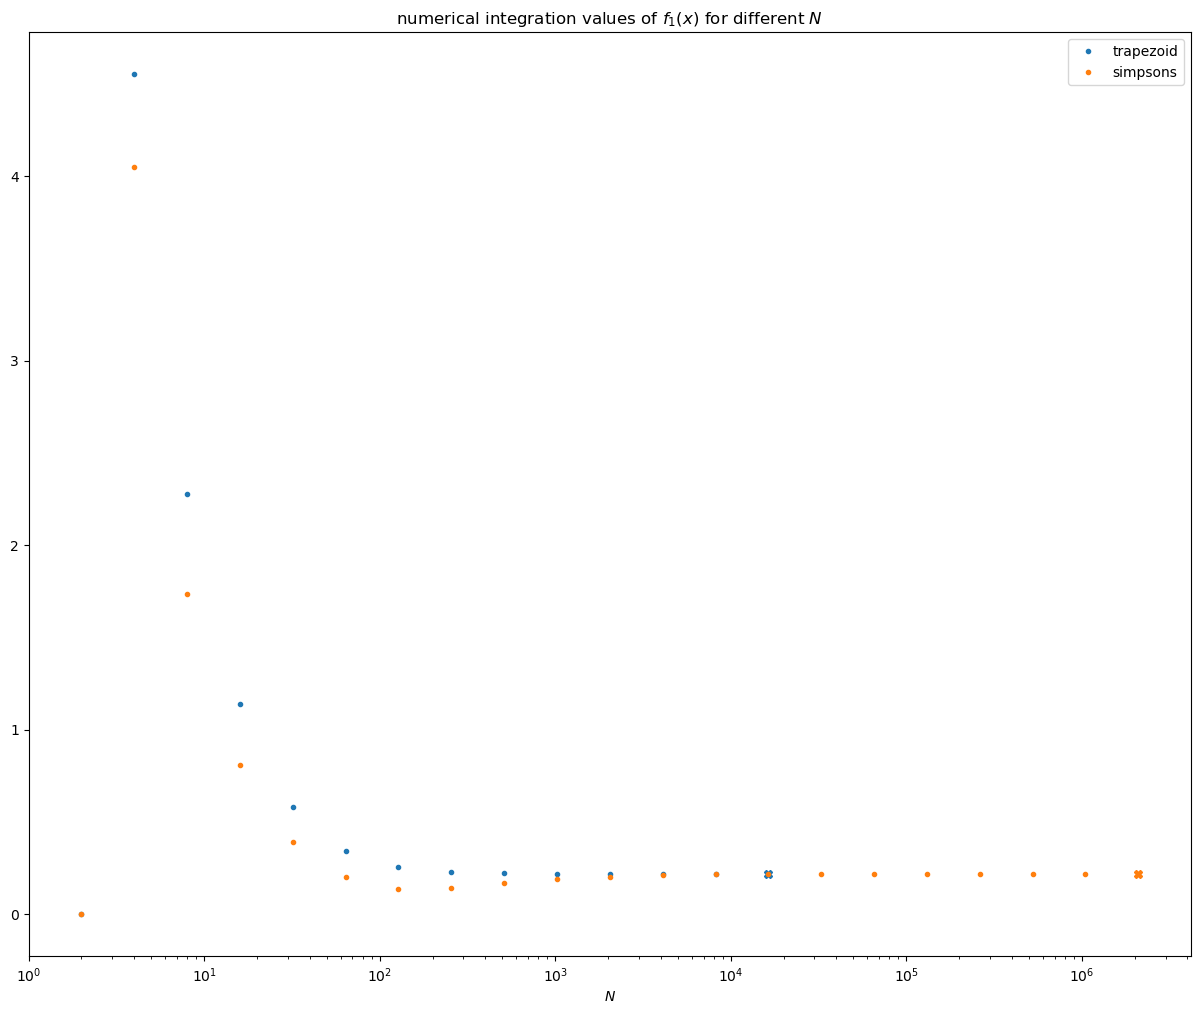

In [8]:
plt.plot(
    N_trap_1[:-1],
    I_trap_1[:-1],
    linestyle="",
    marker=".",
    color="tab:blue",
    label="trapezoid",
)
plt.plot(N_trap_1[-1], I_trap_1[-1], linestyle="", marker="X", color="tab:blue")
plt.plot(
    N_simp_1[:-1],
    I_simp_1[:-1],
    linestyle="",
    marker=".",
    color="tab:orange",
    label="simpsons",
)
plt.plot(
    N_simp_1[-1],
    I_simp_1[-1],
    linestyle="",
    marker="X",
    color="tab:orange",
)
plt.legend()
plt.xscale("log")
plt.xlabel("$N$")
plt.title("numerical integration values of $f_1(x)$ for different $N$")

Text(0.5, 1.0, 'numerical integration values of $f_2(x)$ for different $N$')

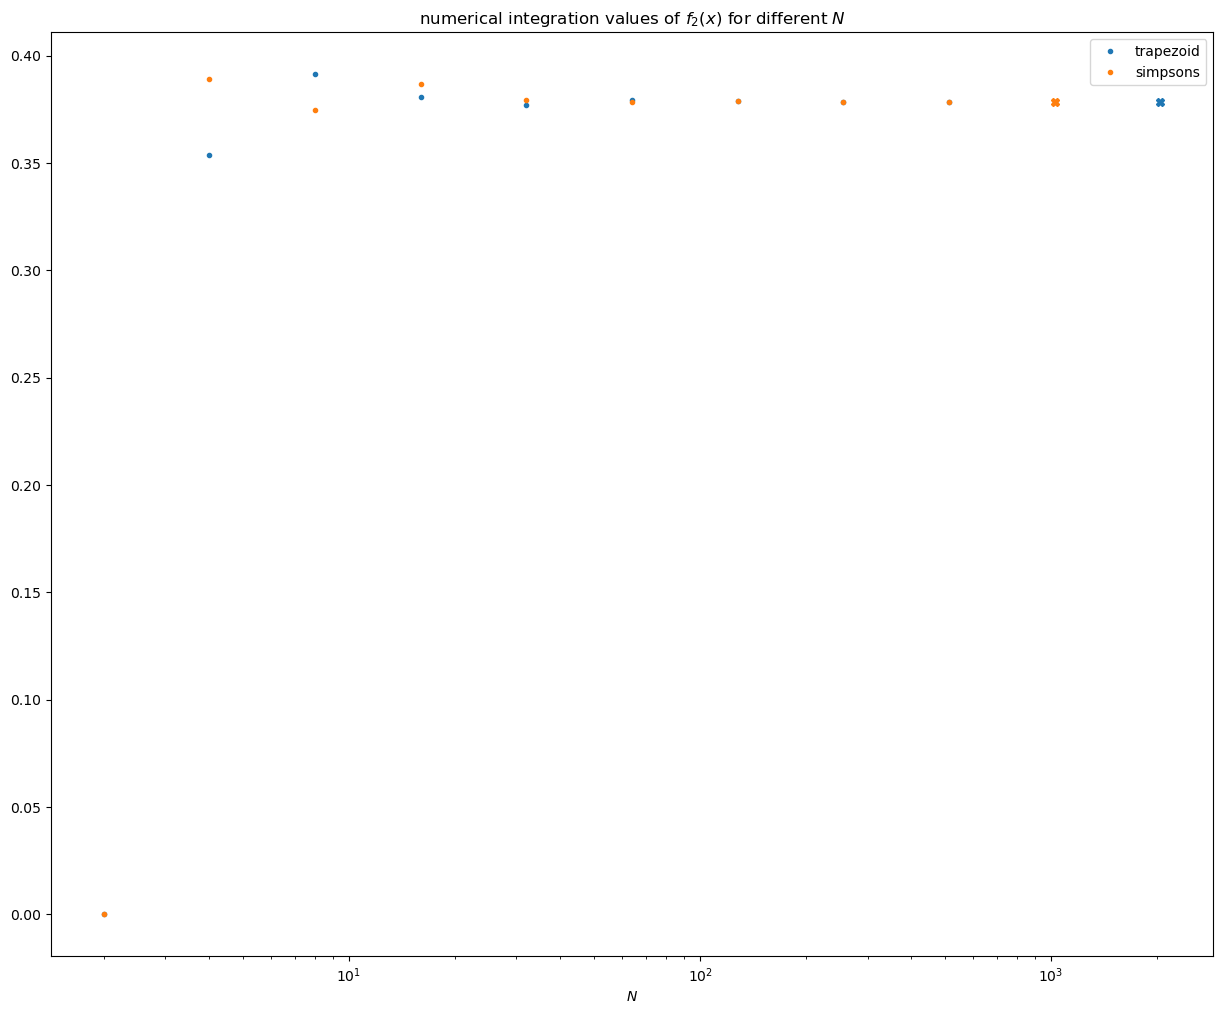

In [9]:
plt.plot(
    N_trap_2[:-1],
    I_trap_2[:-1],
    linestyle="",
    marker=".",
    color="tab:blue",
    label="trapezoid",
)
plt.plot(N_trap_2[-1], I_trap_2[-1], linestyle="", marker="X", color="tab:blue")
plt.plot(
    N_simp_2[:-1],
    I_simp_2[:-1],
    linestyle="",
    marker=".",
    color="tab:orange",
    label="simpsons",
)
plt.plot(
    N_simp_2[-1],
    I_simp_2[-1],
    linestyle="",
    marker="X",
    color="tab:orange",
)
plt.legend()
plt.xscale("log")
plt.xlabel("$N$")
plt.title("numerical integration values of $f_2(x)$ for different $N$")